In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex, plot_distribution
from qiskit.circuit.library import ZGate
from qiskit_aer import Aer

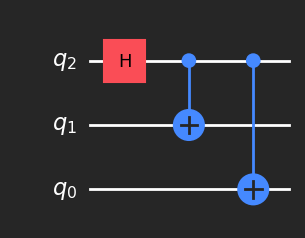

In [10]:
qc = QuantumCircuit(3)
qc.h(2)
qc.cx(2, 1)
qc.cx(2, 0)

qc.draw(reverse_bits=True)

In [11]:
# generate all possible input states 000, 001,... 111
# and their corresponding output states
n_states = 2**3
for n in range(n_states):
    sv = Statevector.from_int(n, n_states)
    sv = sv.evolve(qc)
    display(sv)

# |0>|00> -> |0>|00> + |1>|11> (|0> with the og last 2 qubits + |1> with the flipped last 2 qubits)
# |0>|01> -> |0>|01> + |1>|10>
# |0>|10> -> |0>|10> + |1>|01>
# |0>|11> -> |0>|11> + |1>|00>

### same as before but with a phase shift 
# |1>|00> -> |0>|00> - |1>|11> (|0> with the og last 2 qubits - |1> with the flipped last 2 qubits)
# |1>|01> -> |0>|01> - |1>|10>
# |1>|10> -> |0>|10> - |1>|01>
# |1>|11> -> |0>|11> - |1>|00>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Challenge code
 
 You simply have to complete two quantum functions:
 
 - `encode`: quantum function that will define an operator to be applied only on Zenda's qubits. This function will depend on the bits $(i,j,k)$ to be encoded.
 
 
 - `decode`: quantum function that defines the operator that Reece will use to retrieve the bits that Zenda sent. In this case, the operator does not have any information about Zenda's bits, so the same operators will always be applied regardless of the state that Zenda sends Reece.
 
![img](images/model_superdense.jpeg)

![img](images/sd.png)

 ### Output
 
 In this challenge, we will not judge your solution using public or private test cases. Instead, we will check that, for all combinations of $i$, $j$, and $k$, the entire encoding and decoding circuit behaves as expected.
 
 ### Imports
 The cell below specifies the libraries you should use in this challenge. Run the cell to import the libraries. ***Do not modify the cell.***

In [12]:
import pennylane as qml
from pennylane import numpy as np

### Code
 Complete the code below. Note that during QHack, some sections were not editable. We've marked those sections accordingly here, but you can still edit them if you wish.

In [ ]:
# Uneditable section #
def encode(i, j, k):
    """
    Quantum encoding function. It must act only on the first two qubits.
    This function does not return anything, it simply applies gates.

    Args:
        i, j, k (int): The three encoding bits. They will take the values 1 or 0.

    """
    # End of uneditable section #

    if k == 1:
        qml.PauliX(wires=0)
        qml.PauliX(wires=1)
    if j == 1:
        qml.PauliX(wires=1)
    if i == 1:
        qml.PauliZ(wires=1)

    # if (i, j, k) == (0, 0, 0):
    #     pass
    # elif (i, j, k) == (0, 0, 1):
    #     qml.PauliX(0)
    #     qml.PauliX(1)
    # elif (i, j, k) == (0, 1, 0):
    #     qml.PauliX(1)
    # elif (i, j, k) == (0, 1, 1):
    #     qml.PauliX(0)
    # elif (i, j, k) == (1, 0, 0):
    #     qml.PauliZ(0)
    # elif (i, j, k) == (1, 0, 1):
    #     qml.PauliX(0)
    #     qml.PauliX(1)
    #     qml.PauliZ(0)
    # elif (i, j, k) == (1, 1, 0):
    #     qml.PauliX(1)
    #     qml.PauliZ(0)
    # elif (i, j, k) == (1, 1, 1):
    #     qml.PauliX(0)
    #     qml.PauliZ(1)


# Uneditable section #
def decode():
    """
    Quantum decoding function. It can act on the three qubits.
    This function does not return anything, it simply applies gates.
    """

    # End of uneditable section #

    # Put your code here #
    # Reverse GHZ
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)

# Uneditable section #
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(i, j, k):
    """
    Circuit that generates the complete communication protocol.

    Args:
        i, j, k (int): The three encoding bits. They will take the value 1 or 0.
    """

    # We prepare the state 1/sqrt(2)(|000> + |111>)
    # the GHZ gaet
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

    # Zenda encodes the bitsù
    qml.Barrier(only_visual=True)
    encode(i, j, k)

    # Reece decode the information
    qml.Barrier(only_visual=True)
    decode()

    return qml.probs(wires=range(3))

print(qml.draw(circuit)(0, 0, 0), "\n")
print(circuit(0, 0, 0), "\n\n")

print(qml.draw(circuit)(0, 0, 1), "\n")
print(circuit(0, 0, 1), "\n\n")

print(qml.draw(circuit)(0, 1, 0), "\n")
print(circuit(0, 1, 0), "\n\n")

0: ──H─╭●─╭●──||──||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│───||──||─│──╰X────┤ ├Probs
2: ───────╰X──||──||─╰X───────┤ ╰Probs 

[1. 0. 0. 0. 0. 0. 0. 0.] 


0: ──H─╭●─╭●──||──X──||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│───||──X──||─│──╰X────┤ ├Probs
2: ───────╰X──||─────||─╰X───────┤ ╰Probs 

[0. 1. 0. 0. 0. 0. 0. 0.] 


0: ──H─╭●─╭●──||─────||─╭●─╭●──H─┤ ╭Probs
1: ────╰X─│───||──X──||─│──╰X────┤ ├Probs
2: ───────╰X──||─────||─╰X───────┤ ╰Probs 

[0. 0. 1. 0. 0. 0. 0. 0.] 




These functions are responsible for testing the solution. You will need to run the cell below. ***Do not modify the cell.***

In [29]:
def run(test_case_input: str) -> str:

    return None

def check(solution_output: str, expected_output: str) -> None:

    for i in range(2):
        for j in range(2):
            for k in range(2):
                assert np.isclose(circuit(i, j , k)[4 * i + 2 * j + k],1)

                dev = qml.device("default.qubit", wires=3)

                @qml.qnode(dev)
                def circuit2(i, j, k):
                    encode(i, j, k)
                    return qml.probs(wires=range(3))

                circuit2(i, j, k)
                ops = qml.workflow.construct_tape(circuit2)(i, j, k).operations

                for op in ops:
                    assert not (2 in op.wires), "Invalid connection between qubits."

### Test cases
 Running the cell below will load the test cases. ***Do not modify the cell***.
 - input: No input
 	+ expected output: No output
 - input: No input
 	+ expected output: No output

In [30]:
test_cases = [['No input', 'No output'], ['No input', 'No output']]

### Solution testing
 Once you have run every cell above, including the one with your code, the cell below will test your solution. Run the cell. If you are correct for all of the test cases, it means your solutions is correct. Otherwise, you need to double check your work. ***Do not modify the cell below.***

In [31]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!
Running test case 1 with input 'No input'...
Correct!
